In [1]:
!pip3 install denoising_diffusion_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 10.7 MB/s eta 0:00:00


In [2]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion


In [3]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

In [11]:
diffusion = GaussianDiffusion(
    model,
    image_size = 256,
    timesteps = 1000,   # number of steps
    )

In [12]:
training_images = torch.rand(8, 3, 256, 256) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()

In [13]:
loss

tensor(0.5950, grad_fn=<MeanBackward0>)

In [14]:
sampled_images = diffusion.sample(batch_size = 1)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

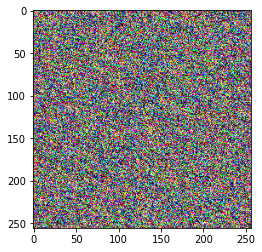

In [ ]:
plt.imshow(sampled_images[0].permute(1,2,0))

In [ ]:
import os

In [ ]:
os.getcwd()

'/home/miil/DATA1/hjy/research/14_230406_ddim_JiyongHan'

In [ ]:
import torch
import torch.nn as nn

In [ ]:

from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    channels =1,
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,           # number of steps
    sampling_timesteps = 250,   # number of sampling timesteps (using ddim for faster inference [see citation for ddim paper])
    loss_type = 'l1'            # L1 or L2
)

trainer = Trainer(
    diffusion,
    '/home/miil/DATA1/hjy/research/14_230406_ddim_JiyongHan/medical_anomaly_data/brainMRI/train/good',
    train_batch_size = 32,
    train_lr = 8e-5,
    train_num_steps = 20000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = False,                       # turn on mixed precision
    calculate_fid = True,              # whether to calculate fid during training
    results_folder ='./brain_results',
    # convert_image_to =

)
trainer.inception_v3.blocks[0][0].conv = nn.Conv2d(in_channels=1,
                                                   out_channels=32,
                                                   kernel_size=(3,3),
                                                   stride=(2,2),
                                                   bias=False)
trainer.inception_v3 = trainer.inception_v3.to(trainer.device)

In [ ]:
trainer.train()

  0%|          | 0/20000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.35048675537109375


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.6094180345535278


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.6311676502227783


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.44142961502075195


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.346915625160529


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.5240623950958252


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.3023144006729126


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.41744792461395264


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.33455801010131836


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.3224341869354248


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.3670541642769778


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.34334802627563477


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.3769209384918213


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.2954045534133911


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.426959753036499


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.4602750539779663


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.44622623920440674


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.510816252594201


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.46907713061218215


sampling loop time step:   0%|          | 0/250 [00:00<?, ?it/s]

fid_score: 0.3991878032684326
training complete
